In [61]:
import numpy as np

a=[55.4, 58.6, 120.2, 417.1, 417.4, 432.2, 442.0, 483.8, 484.4, 506.9, 514.7, 532.2, 532.4, 566.4, 567.4, 616.5, 620.9, 621.2]

no_vibs=int(len(a)/3)
print(no_vibs)
group_size=int(no_vibs/1)
averages=[]

for i in range(0,len(a),group_size):
    group=a[i:i+group_size]
    group_average=sum(group)/len(group)
    averages.append(np.round(group_average,1))
    
print(averages)

6
[250.2, 494.0, 587.5]


Optimization terminated successfully.
         Current function value: 341.111125
         Iterations: 79
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 196.909551
         Iterations: 74
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 22.096032
         Iterations: 49
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 95.897393
         Iterations: 72
         Function evaluations: 143
CO(111): [-92.24070759 254.45253243]
CO(100): [-56.54175944 139.42921106]
CO(110): [ 3.01449306 16.22351312]
CO(211): [-39.71121914 156.27951817]
Optimization terminated successfully.
         Current function value: 533.502487
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 32.528145
         Iterations: 76
         Function evaluations: 145
Optimization

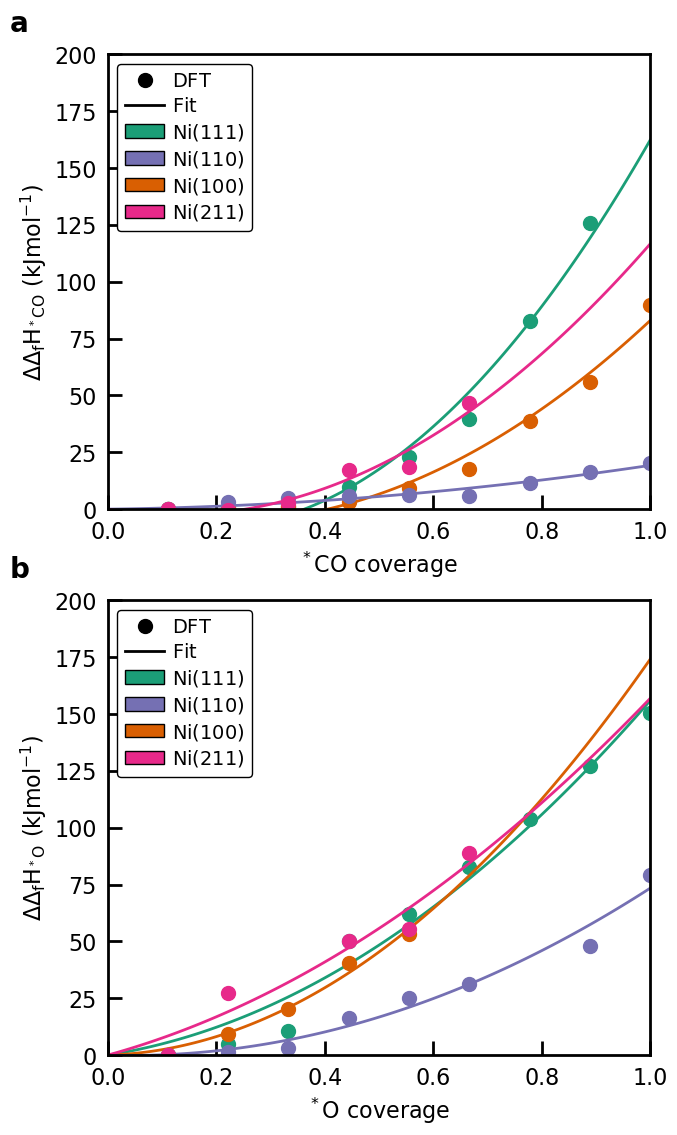

In [5]:
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(7,13)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

#3rd-order polynomials
def fit3rd(params, theta):
    a, b, c = params
    BE = a*theta + b*theta**2 + c*theta**3
    return BE

def minimize_3rd(params, theta, BEs):
    BEs_predicted = fit3rd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fitlin(params, theta):
    a = params
    BE = a*theta
    return BE

def minimize_lin(params, theta, BEs):
    BEs_predicted = fitlin(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9])
hcov_co_111=(np.array([-1.810,-1.806,-1.802,-1.709,-1.573,-1.400,-0.951,-0.506])--1.810)*96.485

theta_co_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_100=(np.array([-1.803,-1.796,-1.791,-1.771,-1.706,-1.620,-1.402,-1.224,-0.873])--1.803)*96.485

theta_co_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_110=(np.array([-1.879,-1.848,-1.828,-1.820,-1.816,-1.818,-1.761,-1.712,-1.668])--1.879)*96.485

theta_co_211 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9])
hcov_co_211=(np.array([-1.777,-1.782,-1.749,-1.597,-1.584,-1.294])--1.777)*96.485

theta_o_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_o_111=(np.array([-5.266,-5.214,-5.154,-4.744,-4.622,-4.407,-4.191,-3.951,-3.709])--5.266)*96.485

theta_o_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9])
hcov_o_100=(np.array([-5.579221085,-5.481302585,-5.367655085,-5.160066335,-5.028485485])--5.579221085)*96.485

theta_o_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9,  8/9, 9/9])
hcov_o_110=(np.array([-5.174,-5.158,-5.142,-5.004,-4.914,-4.848,-4.679,-4.352])--5.174)*96.485

theta_o_211 = np.array([1/9, 2/9, 4/9, 5/9, 6/9])
hcov_o_211=(np.array([-5.233,-4.950,-4.714,-4.658,-4.313])--5.233)*96.485


guess_2nd = (-2.0, 6.0)
h_co_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_111, hcov_co_111))
h_co_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_100, hcov_co_100))
h_co_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_110, hcov_co_110))
h_co_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_211, hcov_co_211))

print('CO(111):', h_co_111)
print('CO(100):', h_co_100)
print('CO(110):', h_co_110)
print('CO(211):', h_co_211)

h_o_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_111, hcov_o_111))
h_o_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_100, hcov_o_100))
h_o_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_110, hcov_o_110))
h_o_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_211, hcov_o_211))

print('O(111):', h_o_111)
print('O(100):', h_o_100)
print('O(110):', h_o_110)
print('O(211):', h_o_211)

poly_covs = np.linspace(0., 1., 101)
poly_hcov_co_111 = fit2nd(h_co_111, poly_covs)
poly_hcov_co_100 = fit2nd(h_co_100, poly_covs)
poly_hcov_co_110 = fit2nd(h_co_110, poly_covs)
poly_hcov_co_211 = fit2nd(h_co_211, poly_covs)

poly_hcov_o_111 = fit2nd(h_o_111, poly_covs)
poly_hcov_o_100 = fit2nd(h_o_100, poly_covs)
poly_hcov_o_110 = fit2nd(h_o_110, poly_covs)
poly_hcov_o_211 = fit2nd(h_o_211, poly_covs)

gs=gridspec.GridSpec(nrows=2, ncols=1)
gs.update(wspace=0.3, hspace=0.2)

import matplotlib.patches as mpatches
patch_Ni111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_Ni110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(100)}$')
patch_Ni100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{Ni(110)}$')
patch_Ni211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{Ni(211)}$')

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[1,0])

ax0.plot(theta_co_111, hcov_co_111, color=colors[0], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_111, color=colors[0], linewidth=2)

ax0.plot(theta_co_100, hcov_co_100, color=colors[1], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_100, color=colors[1], linewidth=2)

ax0.plot(theta_co_110, hcov_co_110, color=colors[2], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_110, color=colors[2], linewidth=2)

ax0.plot(theta_co_211, hcov_co_211, color=colors[3], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_211, color=colors[3], linewidth=2)

ax1.plot(theta_o_111, hcov_o_111, color=colors[0], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_111, color=colors[0], linewidth=2)

ax1.plot(theta_o_100, hcov_o_100, color=colors[1], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_100, color=colors[1], linewidth=2)

ax1.plot(theta_o_110, hcov_o_110, color=colors[2], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_110, color=colors[2], linewidth=2)

ax1.plot(theta_o_211, hcov_o_211, color=colors[3], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_211, color=colors[3], linewidth=2)

#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

ax1.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

ax0.set_ylabel('$\mathrm{\Delta\Delta_f H_{^*CO}\ (kJmol^{-1})}$')
ax0.set_ylim([0, 200])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{^*CO\ coverage}$')

ax1.set_ylabel('$\mathrm{\Delta\Delta_f H_{^*O}\ (kJmol^{-1})}$')
ax1.set_ylim([0, 200])
ax1.set_xlim([0, 1])
ax1.set_xlabel('$\mathrm{^*O\ coverage}$')


import string 
ax0.text(-0.18, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.18, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('coverae_dependence_multifacet.pdf', transparent=False, bbox_inches='tight')
#plt.savefig('enthalpy_multifacet.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()


Optimization terminated successfully.
         Current function value: 0.000018
         Iterations: 48
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 51
         Function evaluations: 95
Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 48
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 50
         Function evaluations: 94
CO(111): [ 0.00631767 -0.03443234]
CO(100): [ 0.00643302 -0.02696365]
CO(110): [-0.01700159 -0.00730738]
CO(211): [ 0.01677211 -0.04974614]
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 61
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 86
Optimization terminated success

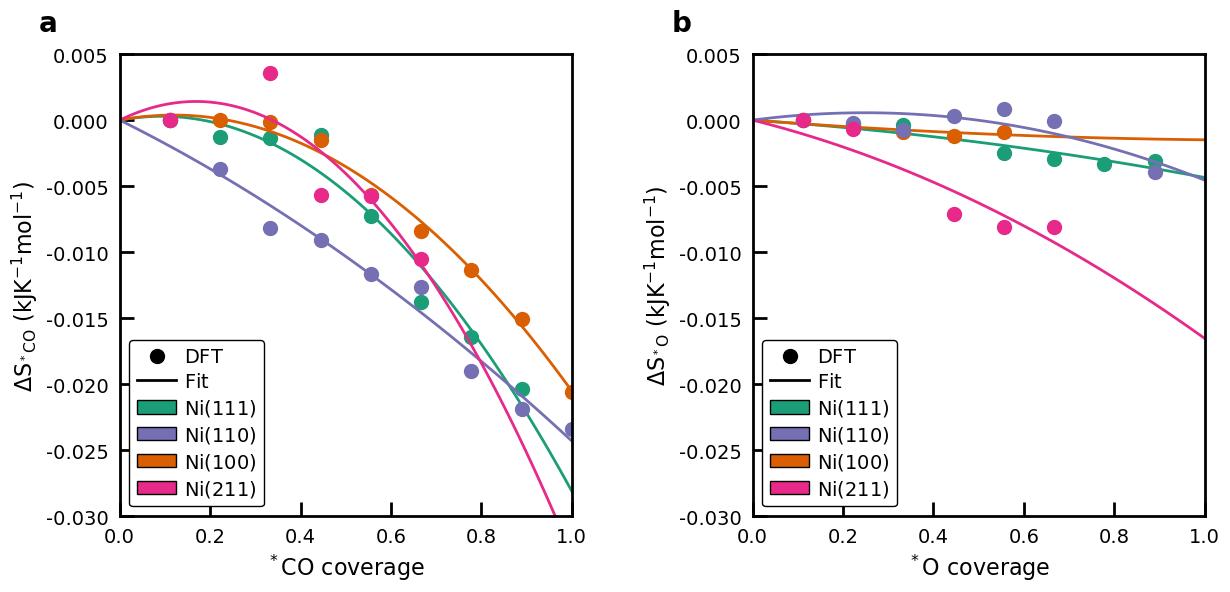

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan  6 23:42:52 2022

@author: bkr
"""
from scipy.optimize import fmin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(14,6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

#3rd-order polynomials
def fit3rd(params, theta):
    a, b, c = params
    BE = a*theta + b*theta**2 + c*theta**3
    return BE

def minimize_3rd(params, theta, BEs):
    BEs_predicted = fit3rd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

#3rd-order polynomials
def fitlin(params, theta):
    a = params
    BE = a*theta
    return BE

def minimize_lin(params, theta, BEs):
    BEs_predicted = fitlin(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse

theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9])
hcov_co_111=(np.array([0.0430259811,0.04176366609,0.04167098904,0.04186308968,0.0357883358,0.02926822219,0.02663131105,0.02267011038])-0.0430259811)

theta_co_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_100=(np.array([0.04493484705,0.04492989919,0.04477080646,0.04345252096,0.03924490716,0.03653986557,0.03359735929,0.02988010717,0.02432397418])-0.04493484705)

theta_co_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_110=(np.array([0.05821450636,0.05451950448,0.05006430459,0.04913751179,0.0465722591,0.04560983192,0.03918591722,0.03635736816,0.03479164283])-0.05821450636)

theta_co_211 = np.array([1/9, 3/9, 4/9, 5/9, 6/9])
hcov_co_211=(np.array([0.0430259811,0.04657589065,0.03735129396,0.03725208789,0.03254105724])-0.0430259811)
theta_o_111 = np.array([1/9, 2/9, 3/9, 5/9, 6/9, 7/9, 8/9])
hcov_o_111=(np.array([0.01201374785,0.0117386695,0.01165379268,0.009540499334,0.009076111414,0.008686271132,0.008928230827])-0.01201374785)

theta_o_100 = np.array([1/9, 2/9, 3/9, 4/9, 5/9])
hcov_o_100=(np.array([0.01638544423,0.01598454411,0.01550220282,0.01518240736,0.01546697982])-0.01638544423)

theta_o_110 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9,  8/9])
hcov_o_110=(np.array([0.01963621936,0.01941877811,0.01886579399,0.01997551198,0.02049227598,0.01958220932,0.01570199648])-0.01963621936)

theta_o_211 = np.array([1/9, 2/9, 4/9, 5/9, 6/9])
hcov_o_211=(np.array([0.02013036684,0.01944956013,0.01300215272,0.0120634638,0.01202534643])-0.02013036684)

guess_2nd = (-2.0, 6.0)
guess_3rd = (-2.0, 6.0,1)
h_co_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_111, hcov_co_111))
h_co_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_100, hcov_co_100))
h_co_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_110, hcov_co_110))
h_co_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co_211, hcov_co_211))

print('CO(111):', h_co_111)
print('CO(100):', h_co_100)
print('CO(110):', h_co_110)
print('CO(211):', h_co_211)

h_o_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_111, hcov_o_111))
h_o_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_100, hcov_o_100))
h_o_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_110, hcov_o_110))
h_o_211 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_o_211, hcov_o_211))

print('O(111):', h_o_111)
print('O(100):', h_o_100)
print('O(110):', h_o_110)
print('O(211):', h_o_211)

poly_covs = np.linspace(0., 1., 101)
poly_hcov_co_111 = fit2nd(h_co_111, poly_covs)
poly_hcov_co_100 = fit2nd(h_co_100, poly_covs)
poly_hcov_co_110 = fit2nd(h_co_110, poly_covs)
poly_hcov_co_211 = fit2nd(h_co_211, poly_covs)

poly_hcov_o_111 = fit2nd(h_o_111, poly_covs)
poly_hcov_o_100 = fit2nd(h_o_100, poly_covs)
poly_hcov_o_110 = fit2nd(h_o_110, poly_covs)
poly_hcov_o_211 = fit2nd(h_o_211, poly_covs)

gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.2)

import matplotlib.patches as mpatches
patch_Ni111=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{Ni(111)}$')
patch_Ni110=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{Ni(100)}$')
patch_Ni100=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{Ni(110)}$')
patch_Ni211=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{Ni(211)}$')

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.plot(theta_co_111, hcov_co_111, color=colors[0], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_111, color=colors[0], linewidth=2)

ax0.plot(theta_co_100, hcov_co_100, color=colors[1], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_100, color=colors[1], linewidth=2)

ax0.plot(theta_co_110, hcov_co_110, color=colors[2], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_110, color=colors[2], linewidth=2)

ax0.plot(theta_co_211, hcov_co_211, color=colors[3], marker='o', linestyle='none')
ax0.plot(poly_covs, poly_hcov_co_211, color=colors[3], linewidth=2)

ax1.plot(theta_o_111, hcov_o_111, color=colors[0], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_111, color=colors[0], linewidth=2)

ax1.plot(theta_o_100, hcov_o_100, color=colors[1], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_100, color=colors[1], linewidth=2)

ax1.plot(theta_o_110, hcov_o_110, color=colors[2], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_110, color=colors[2], linewidth=2)

ax1.plot(theta_o_211, hcov_o_211, color=colors[3], marker='o', linestyle='none')
ax1.plot(poly_covs, poly_hcov_o_211, color=colors[3], linewidth=2)

#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

ax1.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{DFT}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{Fit}$')

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[1],  patch_Ni111, patch_Ni100,patch_Ni110,patch_Ni211])

ax0.set_ylabel('$\mathrm{\Delta S_{^*CO}\ (kJK^{-1}mol^{-1})}$')
ax0.set_ylim([-30/1000, 5/1000])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{^*CO\ coverage}$')

ax1.set_ylabel('$\mathrm{\Delta S_{^*O}\ (kJK^{-1}mol^{-1})}$')
ax1.set_ylim([-30/1000, 5/1000])
ax1.set_xlim([0, 1])
ax1.set_xlabel('$\mathrm{^*O\ coverage}$')


import string 
ax0.text(-0.18, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.18, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('coverage_dependence_multifacet_entropy.pdf', transparent=False, bbox_inches='tight')
#plt.savefig('entropy_multifacet.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()
